           main_category    rating
0          Car&Motorbike  3.800000
1  Computers&Accessories  4.154967
2            Electronics  4.081749
3    Health&PersonalCare  4.000000
4           Home&Kitchen  4.040716
5        HomeImprovement  4.250000
6     MusicalInstruments  3.900000
7         OfficeProducts  4.309677
8             Toys&Games  4.300000


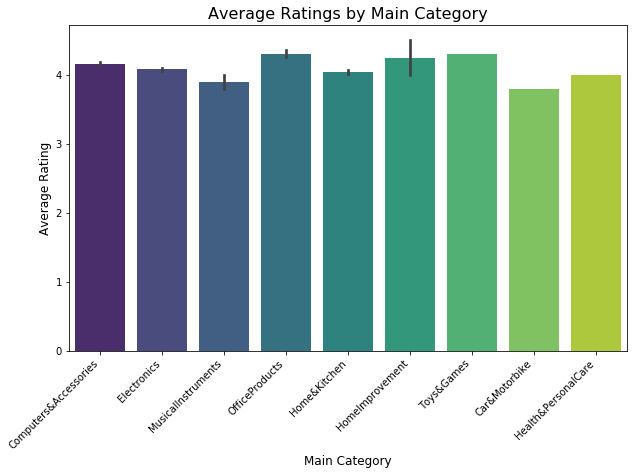

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv('C:/2024_2/amazon.csv')

# 'rating' 열을 숫자 형식으로 변환 (문자열로 저장된 숫자가 있을 경우 처리)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 카테고리 추출 (Main-category만 추출)
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])

# 카테고리별 평균 평점 계산
average_ratings = df.groupby('main_category')['rating'].mean().reset_index()
print(average_ratings)

# 결과 출력
plt.figure(figsize=(10, 6))
sns.barplot(x='main_category', y='rating', data=df, palette='viridis')

# 제목 및 라벨 설정
plt.title('Average Ratings by Main Category', fontsize=16)
plt.xlabel('Main Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.xticks(rotation=45, ha='right')


# 그래프 출력
plt.show()

In [21]:
import pandas as pd


data = pd.read_csv('C:/2024_2/amazon.csv')

# Convert 'rating_count' to numeric (remove commas)
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

# Extract the main category (first part before '|') and create a new column
data['main_category'] = data['category'].apply(lambda x: x.split('|')[0])

# Find the product with the maximum rating_count in each main category
top_main_category_products = data.loc[
    data.groupby('main_category')['rating_count'].idxmax(), 
    ['main_category', 'product_name', 'rating_count']
]

# Reset the index for a clean display
top_main_category_products = top_main_category_products.reset_index(drop=True)

# Display the result
print(top_main_category_products)


           main_category                                       product_name  \
0          Car&Motorbike  Reffair AX30 [MAX] Portable Air Purifier for C...   
1  Computers&Accessories          SanDisk Cruzer Blade 32GB USB Flash Drive   
2            Electronics  AmazonBasics Flexible Premium HDMI Cable (Blac...   
3    Health&PersonalCare  Dr Trust Electronic Kitchen Digital Scale Weig...   
4           Home&Kitchen  Pigeon Polypropylene Mini Handy and Compact Ch...   
5        HomeImprovement  Gizga Essentials Cable Organiser, Cord Managem...   
6     MusicalInstruments  Boya ByM1 Auxiliary Omnidirectional Lavalier C...   
7         OfficeProducts  Casio FX-82MS 2nd Gen Non-Programmable Scienti...   
8             Toys&Games  Faber-Castell Connector Pen Set - Pack of 25 (...   

   rating_count  
0        1118.0  
1      253105.0  
2      426973.0  
3        3663.0  
4      270563.0  
5        5985.0  
6       68664.0  
7       12179.0  
8       15867.0  


           main_category  average_discount_percentage
0          Car&Motorbike                    42.000000
1  Computers&Accessories                    54.024283
2            Electronics                    50.828897
3    Health&PersonalCare                    53.000000
4           Home&Kitchen                    40.120536
5        HomeImprovement                    57.500000
6     MusicalInstruments                    46.000000
7         OfficeProducts                    12.354839
8             Toys&Games                     0.000000


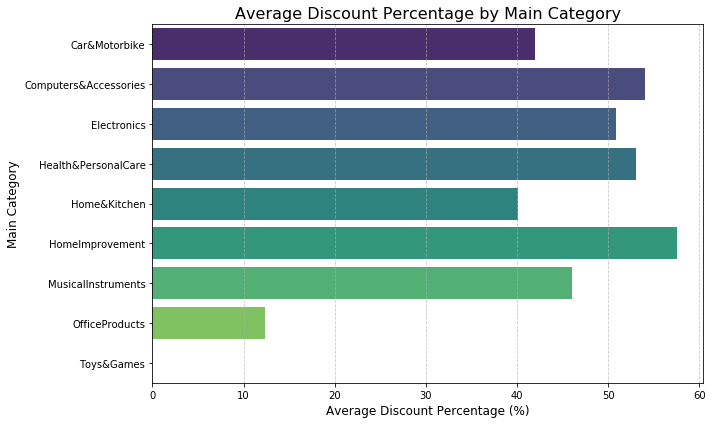

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('C:/2024_2/amazon.csv')

# Convert 'discount_percentage' to numeric (remove '%' and convert to float)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)

# Extract main_category from category
data['main_category'] = data['category'].apply(lambda x: x.split('|')[0])

# Calculate the average discount percentage for each main_category
avg_discount_by_category = data.groupby('main_category')['discount_percentage'].mean().reset_index()

# Rename columns for clarity
avg_discount_by_category.columns = ['main_category', 'average_discount_percentage']

# Display the result
print(avg_discount_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='average_discount_percentage', 
    y='main_category', 
    data=avg_discount_by_category, 
    palette='viridis'
)

# Customize the plot
plt.title('Average Discount Percentage by Main Category', fontsize=16)
plt.xlabel('Average Discount Percentage (%)', fontsize=12)
plt.ylabel('Main Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

data = pd.read_csv('C:/2024_2/amazon.csv')

# Convert 'discounted_price' to numeric (remove non-numeric characters like '₹' and commas)
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert 'rating' to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
filtered_data = data.dropna(subset=['discounted_price', 'rating'])

# Calculate the correlation between discounted_price and rating
correlation = filtered_data['discounted_price'].corr(filtered_data['rating'])

# Display the correlation result
print(f"Correlation between discounted price and rating: {correlation:.4f}")


Correlation between discounted price and rating: 0.1203


           main_category    rating
7         OfficeProducts  4.309677
8             Toys&Games  4.300000
5        HomeImprovement  4.250000
1  Computers&Accessories  4.154967
2            Electronics  4.081749


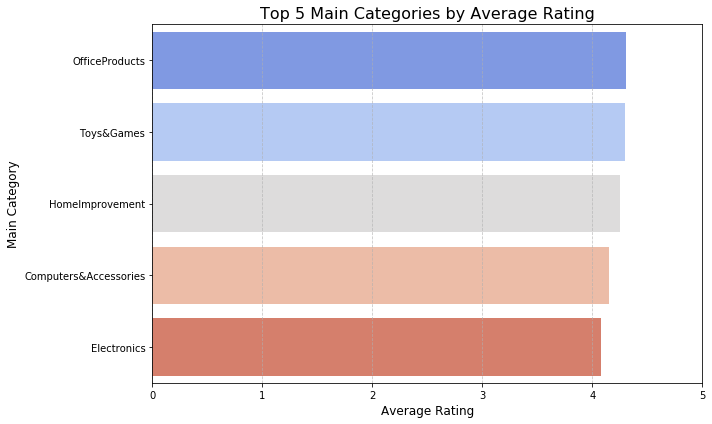

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/2024_2/amazon.csv')

# Convert 'rating' to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Extract main_category from category
data['main_category'] = data['category'].apply(lambda x: x.split('|')[0])

# Calculate the average rating for each main_category
avg_rating_by_category = data.groupby('main_category')['rating'].mean().reset_index()

# Sort by average rating in descending order and select the top 5
top_categories = avg_rating_by_category.sort_values(by='rating', ascending=False).head(5)

# Display the result
print(top_categories)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='rating', 
    y='main_category', 
    data=top_categories, 
    palette='coolwarm'
)

# Customize the plot
plt.title('Top 5 Main Categories by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Main Category', fontsize=12)
plt.xlim(0, 5)  # Ratings typically range from 0 to 5
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
